In [1]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [2]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 

#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 

file = 'Population_Data.csv'

#mung population data
pop_read = pd.read_csv(file)
pop_read
pop_years = pop_read.drop(['2018'], axis = 1)

#mung poplutiaon data for plotting with population vs. disease count
#diesease counts rarley grew to 300, so popluation size of millions have to be 
#scaled down to fit on a graph for visual comparison with hundreds of disease counts
pop_years_fin = pop_years.set_index("County")
pop_years_fin = pop_years_fin.values*.000001
pop_for_scatter = pd.DataFrame(pop_years_fin)



In [3]:
#just viewing info
Vax_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 4 columns):
disease    7670 non-null object
county     7670 non-null object
year       7670 non-null int64
count      7670 non-null int64
dtypes: int64(2), object(2)
memory usage: 239.8+ KB


In [4]:
#Drop disease we are not going to analyze

dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

# drop counties we are not going to analyze

# this is what I used to drop the counties with just adding commas:
#print(Vax_Data.iloc[:,1].unique())
# I copied and pasted the output.  I added 15 commas.  


dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

#same print unique, copy & paste, add commas. Looks ugly - but we are looking at the data, instead of looking at code

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])

dd_complete_15 = dd_complete_15.reset_index()

# dd_complete_4 should be exported to csv for use in individual branches
# dd_complete_15 should also be exported for same reason


In [5]:
#trying to get same dataframe with loop
#Al = []
#for county in Vax_Data:
   # if county is ("Alameda"):
       # Al.append(county)
#Al
#output is []   .....urggggggh
#fail, someone help - i know this can be done - but sometimes my brain doesn't make it happen

In [6]:
# might be helpful down the road?????:
# didn't use this so far:

dd_years_09 = dd_complete_15[dd_complete_15["year"]== 2009]
dd_years_10 = dd_complete_15[dd_complete_15["year"]== 2010]
dd_years_11 = dd_complete_15[dd_complete_15["year"]== 2011]
dd_years_12 = dd_complete_15[dd_complete_15["year"]== 2012]
dd_years_13 = dd_complete_15[dd_complete_15["year"]== 2003]
dd_years_14 = dd_complete_15[dd_complete_15["year"]== 2014]
dd_years_15 = dd_complete_15[dd_complete_15["year"]== 2015]
dd_years_16 = dd_complete_15[dd_complete_15["year"]== 2016]
dd_years_17 = dd_complete_15[dd_complete_15["year"]== 2017]

#this did point me to a quick realization:
#2009 and 2013 only have 45 data points per column, all the other years have 60 
# further counts found that mumps data for 2009 are not available, and i think 2013 as well


In [7]:
#mung data to fit counts of disease per year (2009-2017) by county

dyr = dd_complete_4.set_index('year')
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_meas = ddyr_la[ddyr_la["disease"]== "Measles"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_meas = ddyr_yuba[ddyr_yuba["disease"]== "Measles"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_meas = ddyr_sonoma[ddyr_sonoma["disease"]== "Measles"]

In [8]:
#mung population data to fit plot size


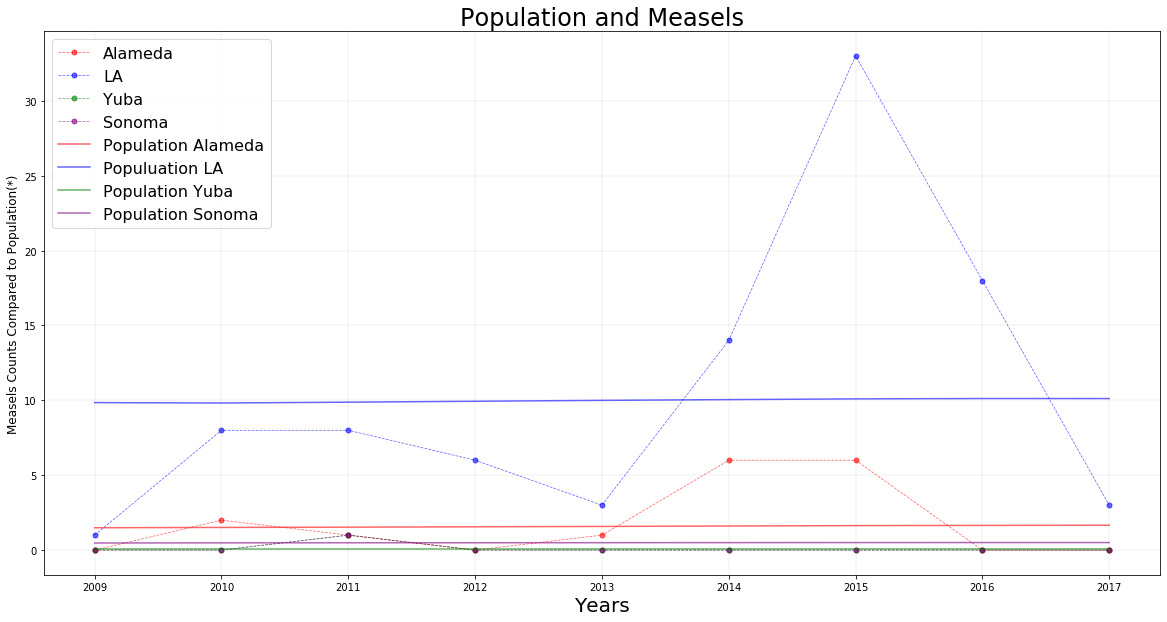

In [9]:

x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

#made the figure bigger to showcase the info best 
plt.figure(figsize=(20,10))

#setting up Measels plot lables, titles, etc.
plt.title('Population and Measels', fontsize = 24)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Measels Counts Compared to Population(*)', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#measles by 4 counties and years
plt.plot(x_axis, ddyr_alameda_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.6, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.6, label = "Sonoma",)

plt.legend(fontsize = 16)

#population by 4 counties and years
# put this here for reference: al = 0, LA = 3, Y = 14, Son = 12
plt.plot(x_axis, pop_for_scatter.iloc[0,:], color = 'r', alpha = 0.6, label = "Population Alameda")
plt.plot(x_axis, pop_for_scatter.iloc[3,:], color = 'b', alpha = 0.6, label = "Populuation LA")
plt.plot(x_axis, pop_for_scatter.iloc[14,:], color = 'g', alpha = 0.6, label = "Population Yuba")
plt.plot(x_axis, pop_for_scatter.iloc[12,:], color = 'purple', alpha = 0.6, label = "Population Sonoma")

plt.legend(fontsize = 16)

#quick analysis = amounts of disease followed a trend easily seen in bigger populations, also seen in small
